In [31]:
netlist_data = """
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

*PYSQUID=========================================================================

.subckt psquid        3  5 
L1                 3         1   #SQUIDL(1.68)pH fcheck
L2                 3         4   #SQUIDL(1.68)pH fcheck
B1                 1         5  jjmod area=#JJAREA(v=0.45, shunt = JJSHUNT)
R1                 1         5   #JJSHUNT(18.08)ohm
B2                 2         5  jjmod area=#JJAREA(v=0.45)
R2                 2         5   #JJSHUNT(18.08)ohm
B3                 4         2  pjjmod area=#PJJAREA(20, fix = true)
.ends

* ===================================================


.subckt JTL     1  5  100
L1               1  2   #JTLL1(14.46)pH fcheck
L2               2  3   #JTLL1(14.46)pH fcheck
L3               3  4   #JTLL1(14.46)pH fcheck
L4               4  5   #JTLL1(14.46)pH fcheck
X1    psquid     3  0
X2    psquid     5  0
R1               100  4   #JTLR1(130.98)ohm
.ends


.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends



*** top cell:  
Vin1                    2    0   PWL(0ps 0mV  400ps 0mV 401ps 0.517mV 402ps 0.517mV 403ps 0mV   600ps 0mV 601ps 0.517mV 602ps 0.517mV 603ps 0mV   800ps 0mV 801ps 0.517mV 802ps 0.517mV 803ps 0mV  1000ps 0mV 1001ps 0.517mV 1002ps 0.517mV 1003ps 0mV)
X2       JTL4           2     3  100
X3       JTL4           3     4  100
X8       JTL4           4     5  100
X9       JTL4           5     6  100
R1                      6     13  8.32ohm
L1                      13     0  2pH fcheck
Vb                      100    0  pwl(0ps 0mV 100ps #BIAS(v=1.25,fix = true)mV)


**netlis file
.tran 1.0ps 2000ps 0ps 1ps

.print phase B1|X1|X1|X3
.print phase B2|X1|X1|X3

.print phase B1|X1|X1|X8
.print phase B2|X1|X1|X8

.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=400e-12
"""

In [32]:
import importlib
from optimize import data
importlib.reload(data)

d = data.Data(netlist_data, True)

--- List of variables to optimize ---
            def    main     sub element    fix    shunt    dp  dpv  tmp
char                                                                   
SQUIDL     1.61    1.61    1.61       L    0.0     None   1.0  7.0  0.0
JJAREA     0.45    0.45    0.45       B  False  JJSHUNT  True  7.0  0.0
JJSHUNT   18.34   18.34   18.34       R  False     None  True  7.0  0.0
PJJAREA   20.00   20.00   20.00       B   True     None  True  7.0  0.0
JTLL1     15.26   15.26   15.26       L  False     None  True  7.0  0.0
JTLR1    127.44  127.44  127.44       R  False     None  True  7.0  0.0
BIAS       1.19    1.19    1.19       V   True     None  True  7.0  0.0


--- Period to calculate the initial value of bias ---
1e-10  ~  4e-10


--- SQUID used for judging the operation ---
[['P(B1|X1|X1|X3)', 'P(B2|X1|X1|X3)'], ['P(B1|X1|X1|X8)', 'P(B2|X1|X1|X8)']]





.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

*PYSQUID=========================================================================

.subckt psquid        3  5 
L1                 3         1   1.61pH fcheck
L2                 3         4   1.61pH fcheck
B1                 1         5  jjmod area=0.45
R1                 1         5   18.34ohm
B2                 2         5  jjmod area=0.45
R2                 2         5   18.34ohm
B3                 4         2  pjjmod area=20.0
.ends

* ===================================================


.subckt JTL     1  5  100
L1               1  2   15.26pH fcheck
L2               2  3   15.26pH fcheck
L3               3  4   15.26pH fcheck
L4               4  5   15.26pH fcheck
X1    psquid     3  0
X2    psquid     5  0
R1               100  4   127.44ohm
.ends


.subckt JTL4    1  5  100
X1       JTL            1  2  10

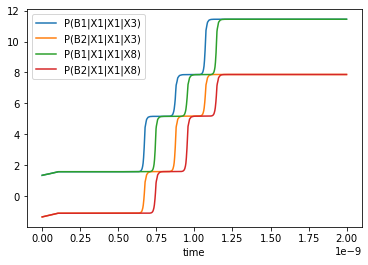

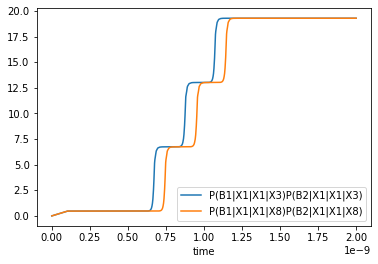

In [33]:
d.default_simulation(True)

In [34]:
from optimize import margin
importlib.reload(margin)

# res = margin.get_margins(d)
# margin.plot(res)
margin.optimize(d,'/home/tanetakumi/main/hfq-optimizer/template/optimize/optimize-data10')




ばらつき0 : 0回目の最適化開始
最小マージン :  JJAREA    21.875000000000004
ばらつき0 : 0回目の最適化終了
ばらつき0 : 1回目の最適化開始
最小マージン :  JJAREA    21.875000000000004
ばらつき0 : 1回目の最適化終了
ばらつき1 : 0回目の最適化開始
最小マージン :  JJAREA    19.531250000000004
ばらつき1 : 0回目の最適化終了
ばらつき1 : 1回目の最適化開始
最小マージン :  JJAREA    22.265624999999993
ばらつき1 : 1回目の最適化終了
ばらつき2 : 0回目の最適化開始
最小マージン :  JJAREA    21.875
ばらつき2 : 0回目の最適化終了
ばらつき2 : 1回目の最適化開始
最小マージン :  JJAREA    22.656249999999996
ばらつき2 : 1回目の最適化終了
ばらつき3 : 0回目の最適化開始
最小マージン :  JJAREA    20.312499999999996
ばらつき3 : 0回目の最適化終了
ばらつき3 : 1回目の最適化開始
最小マージン :  JJAREA    11.718749999999988
ばらつき3 : 1回目の最適化終了
ばらつき4 : 0回目の最適化開始
最小マージン :  JJAREA    23.4375
ばらつき4 : 0回目の最適化終了
ばらつき4 : 1回目の最適化開始
最小マージン :  JJAREA    16.406249999999996
ばらつき4 : 1回目の最適化終了
ばらつき5 : 0回目の最適化開始
最小マージン :  JJAREA    17.96874999999999
ばらつき5 : 0回目の最適化終了
ばらつき5 : 1回目の最適化開始
最小マージン :  JJAREA    6.640624999999997
ばらつき5 : 1回目の最適化終了
ばらつき6 : 0回目の最適化開始
最小マージン :  JJAREA    12.500000000000007
ばらつき6 : 0回目の最適化終了
ばらつき6 : 1回目の最適化開始
最小マージン :  JJAREA    14.062499999

In [35]:
# margin.plot(res)